In [1]:
import transporters.ptc_twiss.configuration as twiss_configuration_gen
import transporters.ptc_track.configuration as track_configuration_gen
import transporters.approximator.configuration as approximator_configuration_gen
import visualization.optics_parameter_visualisation as plotter
import data.grid_configuration as buc
import data.particles_generator as pg
import os
import matplotlib.pyplot as plt
import seaborn as sns
import comparators.transport as transport
import models.train_model as tram
import models.approximator as stub_app
import matplotlib.pyplot as plt
from data.parameters_names import ParametersNames as Parameters

Welcome to JupyROOT 6.18/04


In [2]:
sns.set_style("whitegrid")

In [3]:
path_to_project = "/home/rafalmucha/Pobrane/optic"

optic_folder_name = "2016"

ptc_twiss_script_file_name = "ptc_twiss_script.madx"

xml_file_name = "configuration_reconst_beam1.xml"
item_number = 2

serialized_approximator_file_name = "parametrization_6500GeV_0p4_185_reco.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"

In [4]:
s = 219.55
item_number = 2
path_to_xml_file = os.path.join(path_to_project, optic_folder_name, xml_file_name)
twiss_configuration = twiss_configuration_gen.TwissConfiguration.get_configuration_from_file(path_to_xml_file, item_number, s)

In [5]:
path_to_optic = os.path.join(path_to_project, optic_folder_name)
path_to_xml_file = os.path.join(path_to_project, optic_folder_name, xml_file_name)
track_configuration = track_configuration_gen.TrackConfiguration.get_track_configuration_from_xml_file(path_to_xml_file, item_number)

In [6]:
path_to_approximator = os.path.join(path_to_project, optic_folder_name, serialized_approximator_file_name)
approximator_configuration = approximator_configuration_gen.ApproximatorConfiguration(path_to_approximator, approximator_name)

In [7]:
# Parameters of training
# x_min = x_mean - delta_x
# x_max = x_mean + delta_x
x_mean = 0.0
delta_x = 4e-3
theta_x_mean = 0.000
delta_theta_x = 1.3e-3
y_mean = 0.0
delta_y = 4e-3
theta_y_mean = 0.00
delta_theta_y = 1.3e-3
pt_mean = -0.15
delta_pt = 0.2

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 12000

bunch_configuration = buc.GridConfiguration.from_sigma(x_mean, delta_x, number_of_x_values,
                                                        theta_x_mean, delta_theta_x, number_of_theta_x_values,
                                                        y_mean, delta_y, number_of_y_values,
                                                        theta_y_mean, delta_theta_y, number_of_theta_y_values,
                                                        pt_mean, delta_pt, number_of_pt_values)
particles = pg.generate_from_range(bunch_configuration)

In [8]:
title_sufix = r"2016"
transporter1 = "ptc_track"
transporter2 = "approximator"

In [9]:
x_mean = 0.0
delta_x = 4e-3
theta_x_mean = 0.000
delta_theta_x = 1.3e-3
y_mean = 0.0
delta_y = 4e-3
theta_y_mean = 0.00
delta_theta_y = 1.3e-3
pt_mean = -0.15
delta_pt = 0.15

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 12000

bunch_configuration = buc.GridConfiguration.from_sigma(x_mean, delta_x, number_of_x_values,
                                                        theta_x_mean, delta_theta_x, number_of_theta_x_values,
                                                        y_mean, delta_y, number_of_y_values,
                                                        theta_y_mean, delta_theta_y, number_of_theta_y_values,
                                                        pt_mean, delta_pt, number_of_pt_values)
particles = pg.generate_particles_randomly(bunch_configuration)

In [10]:
transporters = {
    transporter1: track_configuration,
    transporter2: approximator_configuration
}

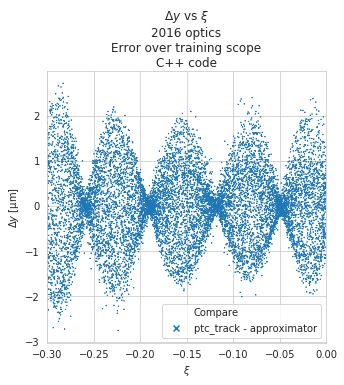

In [11]:
fig = plt.gcf()
fig.set_size_inches(5, 5)

title_sufix = "2016 optics\nError over training scope\nC++ code"

axes = transport.compare(particles, transporters, Parameters.Y, Parameters.PT, plot_function=sns.scatterplot, title_sufix=title_sufix)


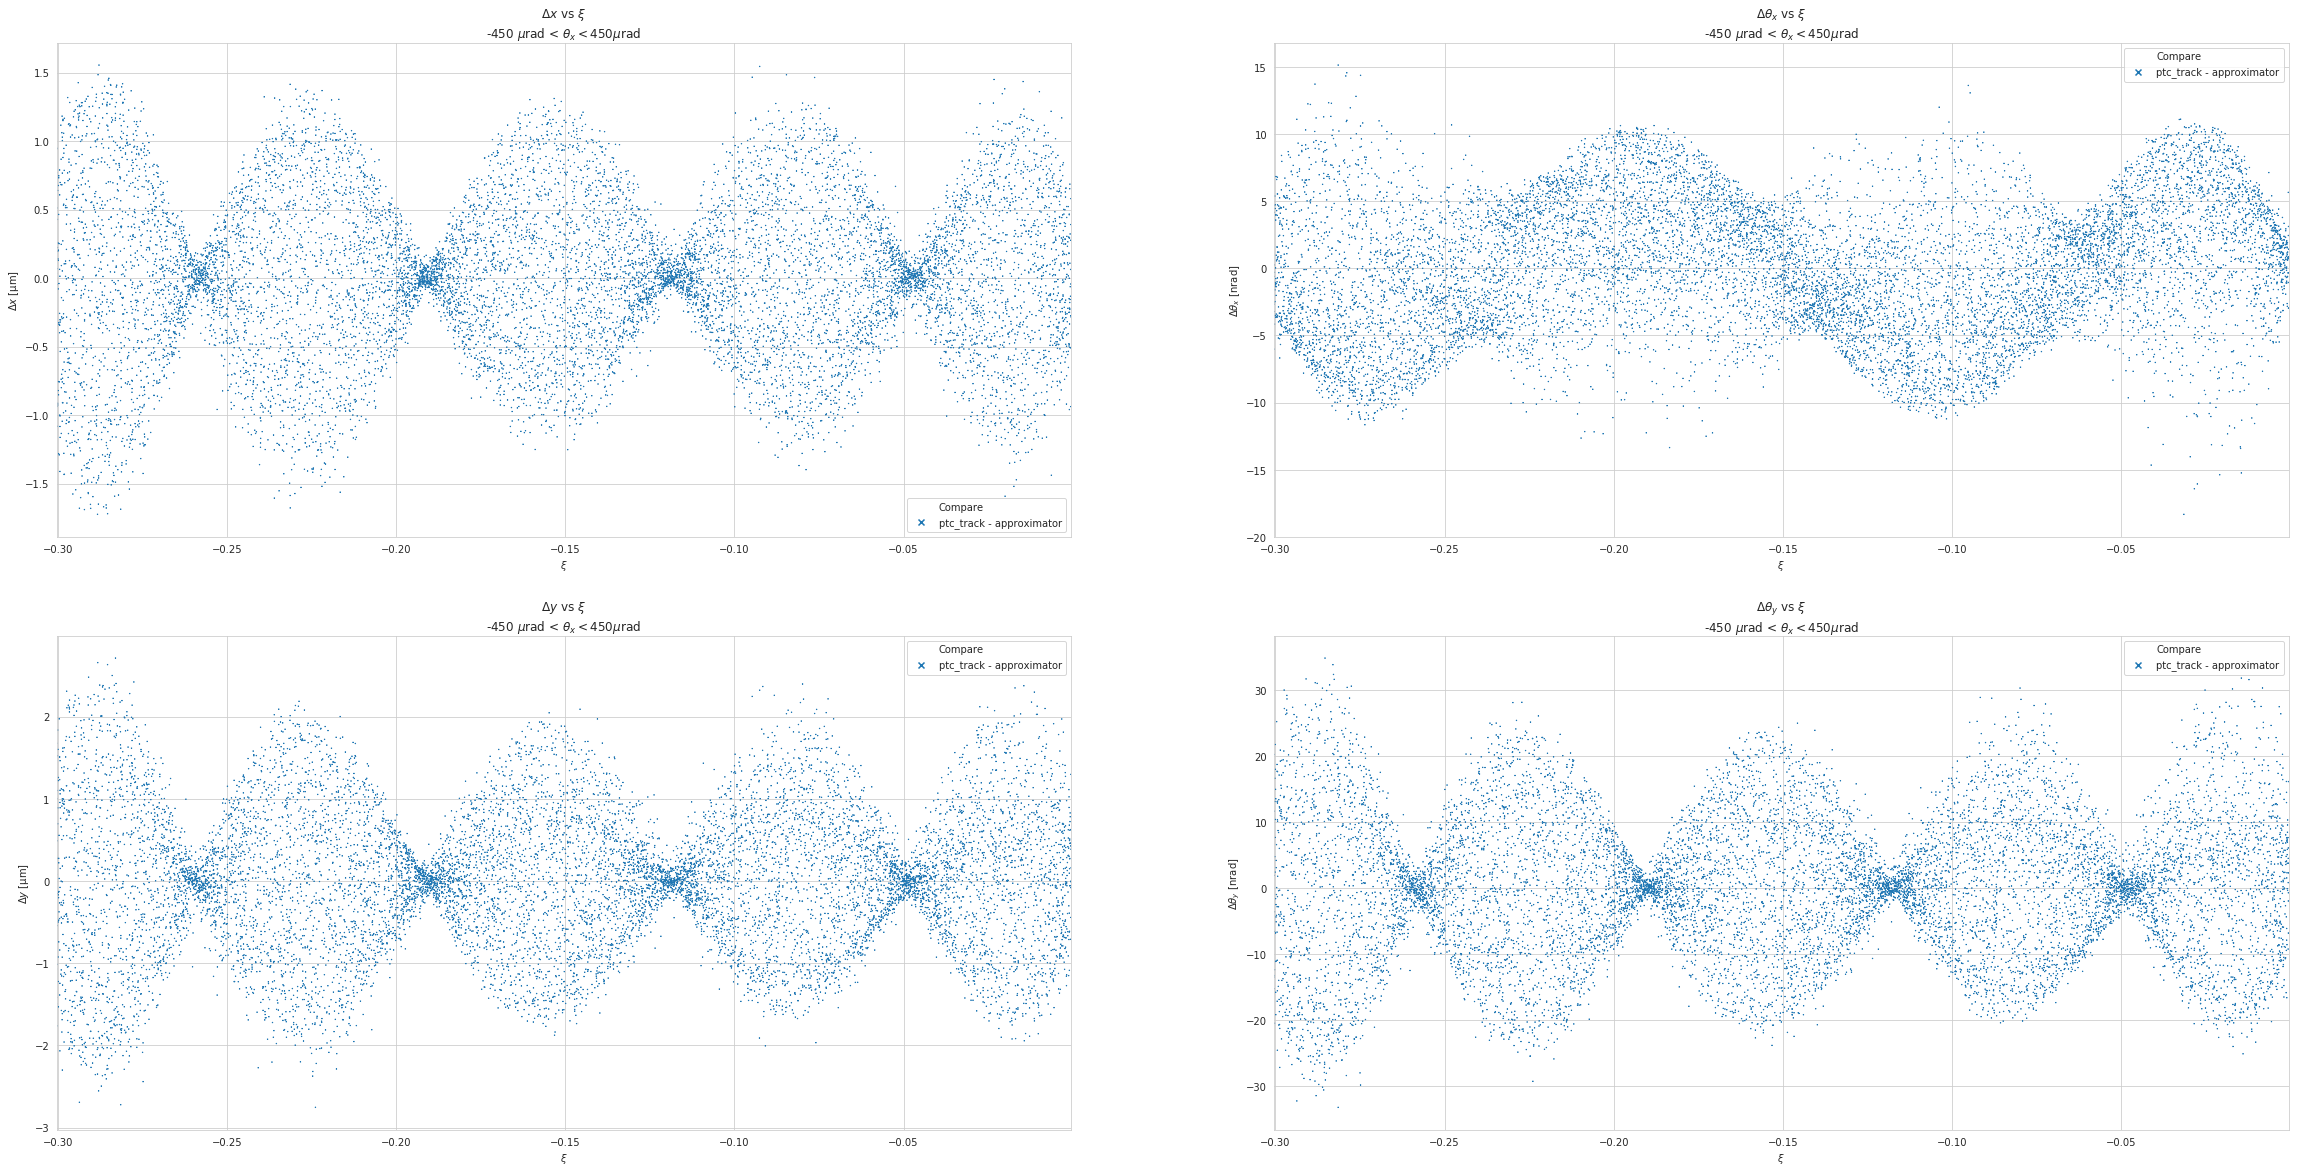

In [12]:
f, axes = plt.subplots(2, 2)

fig = plt.gcf()
fig.set_size_inches(40,20)

title_sufix = r"-450 $\mu$rad < $\theta_x < 450 \mu$rad"


transport.compare(particles, transporters, Parameters.X, Parameters.PT, title_sufix=title_sufix, ax=axes[0][0])
transport.compare(particles, transporters, Parameters.THETA_X, Parameters.PT, title_sufix=title_sufix, ax=axes[0][1])
transport.compare(particles, transporters, Parameters.Y, Parameters.PT, title_sufix=title_sufix, ax=axes[1][0])
transport.compare(particles, transporters, Parameters.THETA_Y, Parameters.PT, title_sufix=title_sufix, ax=axes[1][1])

(-2, 2)

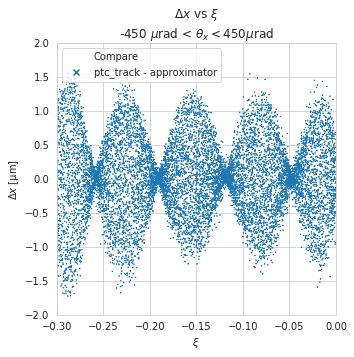

In [13]:
fig = plt.gcf()
fig.set_size_inches(5, 5)
axes = transport.compare(particles, transporters, Parameters.X, Parameters.PT, title_sufix=title_sufix)
axes.set_ylim(-2, 2)

(-10, 10)

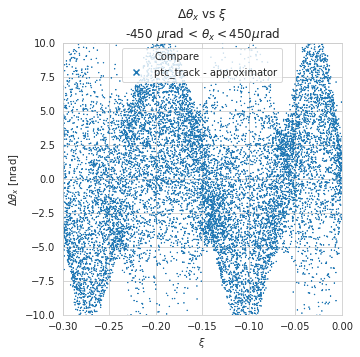

In [14]:
fig = plt.gcf()
fig.set_size_inches(5, 5)
axes = transport.compare(particles, transporters, Parameters.THETA_X, Parameters.PT, title_sufix=title_sufix)
axes.set_ylim(-10, 10)

(-4, 4)

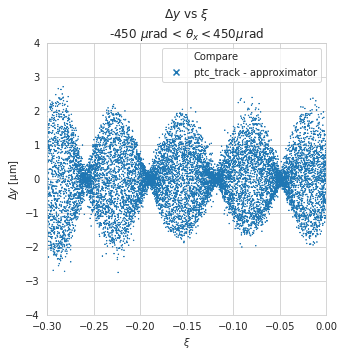

In [15]:
fig = plt.gcf()
fig.set_size_inches(5, 5)
axes = transport.compare(particles, transporters, Parameters.Y, Parameters.PT, title_sufix=title_sufix)
axes.set_ylim(-4, 4)

(-40, 40)

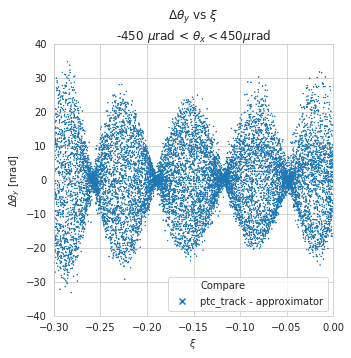

In [16]:
fig = plt.gcf()
fig.set_size_inches(5, 5)
axes = transport.compare(particles, transporters, Parameters.THETA_Y, Parameters.PT, title_sufix=title_sufix)
axes.set_ylim(-40, 40)